# All the news

In [116]:
%%time

from zipfile import ZipFile
import pandas as pd

raw = pd.DataFrame()
with ZipFile('data/all_the_news/all-the-news.zip') as zipfile:
    files = zipfile.namelist()
    for filename in files:
        with zipfile.open(filename) as file:
            raw = raw.append(pd.read_csv(file))

CPU times: user 9.4 s, sys: 3.48 s, total: 12.9 s
Wall time: 21.2 s


In [117]:
raw.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


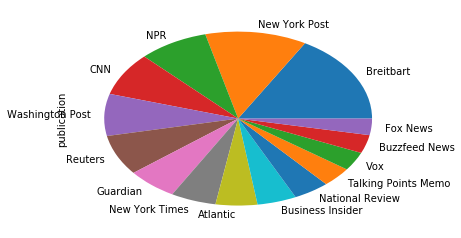

In [110]:
raw["publication"].value_counts().plot.pie()

In [113]:
# Filter all articles that don't have an url anyways
data = raw[raw['url'].notnull()]
# Shuffle for good measure
data = data.sample(frac=1).reset_index(drop=True)
# Lets just work with a few examples for now
data = data.head(1000)

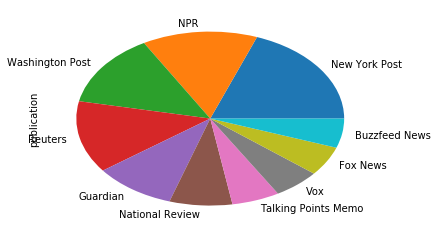

In [114]:
data["publication"].value_counts().plot.pie()

In [115]:
%%time

# Crawl the raw HTML
import urllib
import time
import os
from ipywidgets import FloatProgress
from IPython.display import display

path = "data/all_the_news/%d/" % time.time()
os.makedirs(path)
f = FloatProgress(min=0, max=len(data))
display(f)
for index, article in data[["id","url"]].iterrows():
    f.value += 1
    urllib.request.urlretrieve(article.url, "%s/%s.html" % (path, article.id))

FloatProgress(value=0.0, max=5000.0)

KeyboardInterrupt: 

In [107]:
%%time
# TODO maybe figure out how many of these are 404's and then use wayback machine
path = "data/all_the_news/1535034714"
from bs4 import BeautifulSoup

f = FloatProgress(min=0, max=len(data))
display(f)
video_tags = list()
for file in os.listdir(path):
    f.value += 1
    soup = BeautifulSoup(open("%s/%s" % (path, file)))
    if("</video>" in str(soup.contents)):
        print(len(soup.findAll("video")))
        print(file)
    video_tags += soup.findAll("video")

FloatProgress(value=0.0)

1
141640.html
0
146502.html
1
146968.html
0
150037.html
0
152600.html
CPU times: user 24.5 s, sys: 197 ms, total: 24.7 s
Wall time: 27.9 s


In [99]:
video_tags

[<video class="video-js player-single" controls="" data-account="4137224153001" data-embed="default" data-has-analytics="true" data-nypost-playlist='{"playlist":[{"video_id":"4713562331001","url":"http:\/\/nyp.st\/210eygP","title":"‘My married, cougar boss fired me when I ended our affair’"}]}' data-player="default" data-replaced-player="" data-video-id="4713562331001" id="nyp-brightcove-player-1" style="">
 					</video>,
 <video class="gu-media gu-media--show-controls-at-start gu-media--video js-gu-media--enhance" controls="" data-auto-play="false" data-block-video-ads="false" data-canonical-url="football/video/2016/dec/31/jose-mourinho-fans-love-play-football-video" data-duration="158" data-embed-path="football/video/2016/dec/31/jose-mourinho-fans-love-play-football-video" data-embeddable="false" data-end-slate="/video/end-slate/section/football.json?shortUrl=https://gu.com/p/5th6t" data-media-id="gu-video-58680198e4b0c44bce1ef7e8" data-show-end-slate="true" data-title="Paul Pogba c